<html>
<head>
  <title>The IUCN Red List</title>
  <meta name="author" content="Giovanni Zedda">
  <meta name="editor" content="VS Code">
  <link rel="stylesheet" href="style.css" type="text/css">
</head>  
<body>
<header>
  <h1>The IUCN Red List</h1>
  <h2>Una panoramica sulle specie in via di estinzione con Python</h2>
  <p class = "small">ad opera di <b>Giovanni Zedda</b></p>
</header>
</body>
</html>


<h3>Prima di iniziare</h3>
<ul>
 <li> Assicurarsi di possedere tutti i file necessari nella stessa cartella.</li>
 <li> Accertarsi di avere una versione Python uguale o superiore a 3.10 installata.</li>
 <li> Installare <tt>pandas</tt>, <tt>matplotlib</tt> e <tt>jupyter</tt> nel proprio ambiente di lavoro. <br>
      A tal fine, eseguire <code>pip install -r requirements.txt</code> da terminale o scaricare manualmente i pacchetti.</li>
 <li> Il notebook fa uso di HTML. Per una corretta visualizzazione, usare un applicativo adatto (ad esempio Visual Studio Code). <br>
      In alternativa, eseguire <code>jupyter notebook redlist.ipynb</code> da terminale.</li>
 <li> Attivare una connessione di rete funzionante.</li>
 <li> Buona lettura!</li>
</ul>

<h3>Cos'è la Lista Rossa IUCN?</h3>
<p>L'International Union for Conservation of Nature (IUCN) è un'organizzazione parzialmente governativa ed è la massima autorità nel monitoraggio e nella salvaguardia dei beni naturali.<a href="#N1"><sup>[1]</sup></a><br>
Essa mette a disposizione un ampio catalogo con oltre 150'000 specie viventi, oltre a fornire descrizioni dettagliate sulle caratteristiche fisiche e tassonomiche della specie, sull'areale in cui vive e sui fattori attuali o potenziali che la minacciano.<br>
Questo elenco è noto con il nome di Lista Rossa (in inglese, "Red List") ed è la raccolta più esaustiva esistente sullo stato di conservazione delle specie, distinte in base al grado di minaccia in<a href="#N2"><sup>[2]</sup></a>:
<ul>
<li> dati insufficienti (DD - Data Deficient)</li>
<li> a rischio minimo (LC - Least Concern)</li>
<li> prossimo alla minaccia (NT - Near Threatened)</li>
<li> vulnerabile (VU - Vulnerable)</li>
<li> in pericolo (EN - Endangered)</li>
<li> in pericolo critico (CE - Critically Endangered)</li>
<li> estinto in natura (EW - Extinct In The Wild)</li>
<li> estinto (EX - Extinct)</li>
<li> non valutata (NE - Not Evaluated)</li>
</ul>
Si noti che le specie non valutate, a differenza di quelle i cui dati sono insufficienti, non sono contenute nella Lista Rossa, che, d'altro canto, contiene una percentuale minima del numero di specie esistenti, stimato a svariati milioni.<br>
In questa sede, inoltre, per motivi didattici, ci si limiterà ad analizzare solo gli animali vertebrati, o, quantomeno, un loro sottoinsieme di 60'000 specie.</p>
<p>Tutte le risorse dati che verranno utilizzate sono state reperite presso il <a href="https://www.iucnredlist.org" target="_blank">sito ufficiale</a> della IUCN Red List.</p>
<p>Vediamo ora come manipolare queste informazioni con Python.</p>

<h3>Creazione del DataFrame con gli animali</h3>
<p>Le informazioni necessarie per cominciare sono contenute nel file <tt>simple_summary.csv</tt>.<br>
Leggiamole in un DataFrame<a href="#N3"><sup>[3]</sup></a> della libreria pandas.</p>

In [1]:
import pandas as pd

species = pd.read_csv("simple_summary.csv")
species.head()

,assessmentId,internalTaxonId,scientificName,kingdomName,phylumName,orderName,className,familyName,genusName,speciesName,infraType,infraName,infraAuthority,authority,redlistCategory,redlistCriteria,criteriaVersion,populationTrend,scopes
0,495630,10030,Hexanchus griseus,ANIMALIA,CHORDATA,HEXANCHIFORMES,CHONDRICHTHYES,HEXANCHIDAE,Hexanchus,griseus,NaN,NaN,NaN,"(Bonnaterre, 1788)",Near Threatened,A2bd,3.1,Decreasing,Global
1,495907,10041,Heosemys annandalii,ANIMALIA,CHORDATA,TESTUDINES,REPTILIA,GEOEMYDIDAE,Heosemys,annandalii,NaN,NaN,NaN,"(Boulenger in Annandale &amp; Robinson, 1903)",Critically Endangered,A2cd+4cd,3.1,Decreasing,Global
2,497499,132523146,Hubbsina turneri,ANIMALIA,CHORDATA,CYPRINODONTIFORMES,ACTINOPTERYGII,GOODEIDAE,Hubbsina,turneri,NaN,NaN,NaN,"(de Buen, 1940)",Critically Endangered,"B1ab(i,ii,iii,iv)+2ab(i,ii,iii,iv)",3.1,Decreasing,Global
3,498370,10767,Ictalurus australis,ANIMALIA,CHORDATA,SILURIFORMES,ACTINOPTERYGII,ICTALURIDAE,Ictalurus,australis,NaN,NaN,NaN,"(Meek, 1904)",Data Deficient,NaN,3.1,Decreasing,Global
4,498476,10769,Ictalurus mexicanus,ANIMALIA,CHORDATA,SILURIFORMES,ACTINOPTERYGII,ICTALURIDAE,Ictalurus,mexicanus,NaN,NaN,NaN,"(Meek, 1904)",Vulnerable,D2,3.1,Unknown,Global


<p>Per eliminare le informazioni superflue, mancanti, ridondanti, o comunque poco interessanti in questo contesto, usiamo il metodo <tt>drop</tt> della classe <tt>DataFrame</tt>.</p>

In [2]:
species.drop(columns=['infraType', 'infraName', 'infraAuthority', 
              'redlistCriteria', 'criteriaVersion', 'speciesName', 'scopes'], inplace=True)

species.head()

,assessmentId,internalTaxonId,scientificName,kingdomName,phylumName,orderName,className,familyName,genusName,authority,redlistCategory,populationTrend
0,495630,10030,Hexanchus griseus,ANIMALIA,CHORDATA,HEXANCHIFORMES,CHONDRICHTHYES,HEXANCHIDAE,Hexanchus,"(Bonnaterre, 1788)",Near Threatened,Decreasing
1,495907,10041,Heosemys annandalii,ANIMALIA,CHORDATA,TESTUDINES,REPTILIA,GEOEMYDIDAE,Heosemys,"(Boulenger in Annandale &amp; Robinson, 1903)",Critically Endangered,Decreasing
2,497499,132523146,Hubbsina turneri,ANIMALIA,CHORDATA,CYPRINODONTIFORMES,ACTINOPTERYGII,GOODEIDAE,Hubbsina,"(de Buen, 1940)",Critically Endangered,Decreasing
3,498370,10767,Ictalurus australis,ANIMALIA,CHORDATA,SILURIFORMES,ACTINOPTERYGII,ICTALURIDAE,Ictalurus,"(Meek, 1904)",Data Deficient,Decreasing
4,498476,10769,Ictalurus mexicanus,ANIMALIA,CHORDATA,SILURIFORMES,ACTINOPTERYGII,ICTALURIDAE,Ictalurus,"(Meek, 1904)",Vulnerable,Unknown


<p>Ora si vuole effettuare la ricerca di uno specifico animale. Ad esempio dell'orso bruno (<i>Ursus arctos</i>). </p>

In [3]:
species.loc[species['scientificName'] == 'Ursus arctos']

,assessmentId,internalTaxonId,scientificName,kingdomName,phylumName,orderName,className,familyName,genusName,authority,redlistCategory,populationTrend
43659,121229971,41688,Ursus arctos,ANIMALIA,CHORDATA,CARNIVORA,MAMMALIA,URSIDAE,Ursus,"Linnaeus, 1758",Least Concern,Stable


<h3>Costruzione di una classe <tt>Animal</tt> </h3>
<p>Per agevolare le operazioni successive, creiamo una classe <tt>Animal</tt> che prende come parametro di inizializzazione il nome scientifico della specie ed in base ad esso crea i dovuti attributi. </p>
<p>Per accedere ad ulteriori informazioni sulla specie, si può far uso degli attributi <tt>assessmentId</tt> e <tt>internalTaxonId</tt> per accedere alla pagina web, per come essa è strutturata, ovvero <tt>https://www.iucnredlist.org/species/[internalTaxonId]/[assessmentId]</tt>. </p>

In [4]:
WEBSITE = "https://www.iucnredlist.org"

class Animal:
    def __init__(self, name: str):
        self.name = name.capitalize()
        self.info = species.loc[species['scientificName'] == self.name]
        self.is_listed = False if len(self.info) == 0 else True
        if self.is_listed:
            self.kingdom = self.info.loc[self.info.index[0], 'kingdomName']
            self.phylum = self.info.loc[self.info.index[0], 'phylumName']
            self.classis = self.info.loc[self.info.index[0], 'className'] # "class" avrebbe provocato conflittualità
            self.order = self.info.loc[self.info.index[0], 'orderName']
            self.family = self.info.loc[self.info.index[0], 'familyName']
            self.genus = self.info.loc[self.info.index[0], 'genusName']
            self.authority = self.info.loc[self.info.index[0], 'authority']
            self.status = self.info.loc[self.info.index[0], 'redlistCategory']
            self.trend = self.info.loc[self.info.index[0], 'populationTrend']
            self.assessmentId = self.info.loc[self.info.index[0], 'assessmentId']
            self.internalTaxonId = self.info.loc[self.info.index[0], 'internalTaxonId']
            self.url = f"{WEBSITE}/species/{self.internalTaxonId}/{self.assessmentId}"


    def __str__(self) -> str:
        if self.is_listed:
            return (
                f"Name: {self.name} ({self.authority})\n"
                f"Class: {self.classis}\n"
                f"Order: {self.order}\n"
                f"Family: {self.family}\n"
                f"Conservation: {self.status} ({self.trend})\n"
                f"Info: {self.url}"
            )
        return f"{self.name} (not listed)"

animal = Animal("Ursus arctos")
print(animal)



Name: Ursus arctos (Linnaeus, 1758)
Class: MAMMALIA
Order: CARNIVORA
Family: URSIDAE
Conservation: Least Concern (Stable)
Info: https://www.iucnredlist.org/species/41688/121229971


<h3>Interazione con altri DataFrame</h3>
<p>Cercare un animale tramite il solo nome scientifico può risultare complicato, perché non sempre è noto all'utente. <br>
Di solito è più semplice conoscere il nome comune. A questo scopo il dataset <tt>common_names.csv</tt> può essere d'aiuto.</p>

In [5]:
names = pd.read_csv("common_names.csv")
names.head()

,internalTaxonId,scientificName,name,language,main
0,10030,Hexanchus griseus,Bluntnose Sixgill Shark,English,True
1,10041,Heosemys annandalii,Yellow-headed Temple Turtle,English,True
2,132523146,Hubbsina turneri,Mexclapique Michoacano,Spanish; Castilian,False
3,132523146,Hubbsina turneri,Highland Splitfin,English,True
4,10767,Ictalurus australis,Bagre del Panuco,Spanish; Castilian,False


<p>Per accedere alla nomenclatura inglese dell'animale è consigliabile usare la colonna <tt>main</tt> e non <tt>language</tt>. <br>
È intuitivo capire il motivo eseguendo la linea di codice qui sotto: </p>

In [6]:
names.loc[names['scientificName'] == 'Ursus arctos']

,internalTaxonId,scientificName,name,language,main
84342,41688,Ursus arctos,Grizzly Bear,English,False
84343,41688,Ursus arctos,Oso Pardo,Spanish; Castilian,False
84344,41688,Ursus arctos,Ours brun,French,False
84345,41688,Ursus arctos,Brown Bear,English,True


<p><tt>main</tt> ha valore True in corrispondenza del nome canonico (in questo caso 'Brown Bear'), False altrimenti, mentre con <tt>language</tt> è possibile trovare sinonimi dell'animale, anche in inglese ('Grizzly Bear'), dunque non è un indicatore univoco. </p>

In [7]:
more_info = names.query("main and scientificName == \'Ursus arctos\'")
# scrittura compatta di
# more_info = names.loc[(names['main']) & (names['scientificName'] == 'Ursus arctos')]

# more_info = names.query("language == \'English\' and scientificName == \'Ursus arctos\'")
# restituirebbe un DataFrame a più righe, con 'Grizzly Bear' come prima occorrenza

animal.vernacular = more_info.loc[more_info.index[0], 'name']
animal.vernacular

'Brown Bear'

<p>Può tornare estremamente utile effettuare l'operazione inversa, ossia ricavare il nome scientifico a partire dal nome comune, operazione che non verrà eseguita in questa trattazione, ma disponibile sull'applicativo finale <tt>launcher.py</tt>. </p> 
<p>Si noti invece come tra i file nella cartella sia presente anche un file più pesante degli altri denominato <tt>assessments.csv</tt>, contenente molte altre informazioni aggiuntive, come la descrizione, la distribuzione e l'habitat, e le minacce a cui è sottoposto.</p>

In [8]:
# Essendo assessmentId univoco lo si può utilizzare come chiave
assessments = pd.read_csv("assessments.csv", index_col = 'assessmentId') 
assessments.head()

,internalTaxonId,scientificName,redlistCategory,redlistCriteria,yearPublished,assessmentDate,criteriaVersion,language,rationale,habitat,...,populationTrend,range,useTrade,systems,conservationActions,realm,yearLastSeen,possiblyExtinct,possiblyExtinctInTheWild,scopes
assessmentId,,,,,,,,,,,,,,,,,,,,,
495630,10030,Hexanchus griseus,Near Threatened,A2bd,2020,2019-11-21 00:00:00 UTC,3.1,English,<p>The&#160;Bluntnose Sixgill Shark (<em>Hexan...,"<p><span lang=""EN-GB""><span lang=""EN-GB"">The B...",...,Decreasing,"The Bluntnose Sixgill Shark has a widespread, ...","<p>The species is utilized for its meat, liver...",Marine,"<p>Since 2010, the European Union Fisheries Co...",NaN,NaN,False,False,Global
495907,10041,Heosemys annandalii,Critically Endangered,A2cd+4cd,2021,2018-03-13 00:00:00 UTC,3.1,English,<p><em>Heosemys annandalii</em> is considered ...,<p><em>Heosemys annandalii</em> inhabits lowla...,...,Decreasing,<p>The range of <em>Heosemys annandalii</em> i...,The species is collected for local consumption...,Terrestrial|Freshwater (=Inland waters),<p><em>Heosemys annandalii </em>is included in...,Indomalayan,NaN,False,False,Global
497499,132523146,Hubbsina turneri,Critically Endangered,"B1ab(i,ii,iii,iv)+2ab(i,ii,iii,iv)",2019,2018-04-17 00:00:00 UTC,3.1,English,The Highland Splitfin is now only known to be ...,<p>This species lives in quiet waters with cur...,...,Decreasing,The Highland Splitfin is a freshwater fish spe...,The Highland Splitfin is not a target species ...,Freshwater (=Inland waters),No conservation actions targeting&#160;<em>Hub...,Neotropical,NaN,False,False,Global
498370,10767,Ictalurus australis,Data Deficient,NaN,2019,2018-12-06 00:00:00 UTC,3.1,English,<p><em>Ictalurus australis</em> occurs in east...,<p><em>I. australis </em>inhabits quiet and sl...,...,Decreasing,<p><em>Ictalurus australis</em> is distributed...,<em>I. australis </em>is primarily harvested a...,Freshwater (=Inland waters),<p>The American Fisheries Society Endangered S...,Neotropical,NaN,False,False,Global
498476,10769,Ictalurus mexicanus,Vulnerable,D2,2019,2018-12-06 00:00:00 UTC,3.1,English,<em>I. mexicanus </em>is herein categorized as...,<p>Specifics details are unknown for this spec...,...,Unknown,<p><em>Ictalurus mexicanus</em> is a species e...,This species is not utilised or traded.,Freshwater (=Inland waters),"<p>In Mexico,&#160;<em>Ictalurus mexicanus</em...",Neotropical,NaN,False,False,Global


<p>Volendo, è possibile creare una pagina html per visualizzare in modo comprensivo queste informazioni, senza dover accedere al sito. <br>
Ad esempio: </p>

In [9]:
far_more_info = assessments.loc[animal.assessmentId]

html_content = (
    f"<main = style=\"background-color: #444444; color: white;\">"
    f"<h1>{animal.vernacular}</h1>"
    f"<h2><i>{animal.name}</i></h2>"
    f"<h2>Assessment</h2>"
    f"<p><b>{animal.status}</b> ({animal.trend})."
    f"{far_more_info['rationale']}</p>"
    f"</main>"
)

### Queste due linee di codice permettono un output per ipynb.
from IPython.display import display, HTML
display(HTML(html_content))

<h3>Rappresentazioni grafiche</h3>
<p>Finora ci si è limitati ad accedere e visualizzare i dati testuali, ma <tt>pandas.DataFrame</tt> fornisce molti metodi compatibili con la libreria <tt>matplotlib</tt> che permettono di avere un'analisi grafica delle informazioni contenute in tabella.</p>

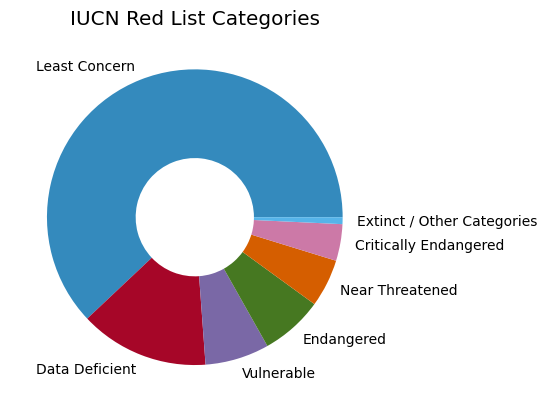

In [10]:
import matplotlib.pyplot as plt
plt.style.use('bmh')

tmp = species.value_counts('redlistCategory', normalize = True)

### unisco le voci minori sotto un'unica categoria
gt_percentile = tmp[tmp>=0.01]
gt_percentile['Extinct / Other Categories'] = tmp[tmp<0.01].sum()
###

gt_percentile.plot.pie(title = 'IUCN Red List Categories', ylabel='', wedgeprops=dict(width=0.6))
plt.show()

<p>Grazie a questo areogramma, si può subito intuire come quasi un quarto delle specie sia esposto a un qualche livello di minaccia.</p>
<p>Nelle successive due caselle di codice si prova a complicare leggermente questa operazione effettuando una distinzione tra le classi.</p>

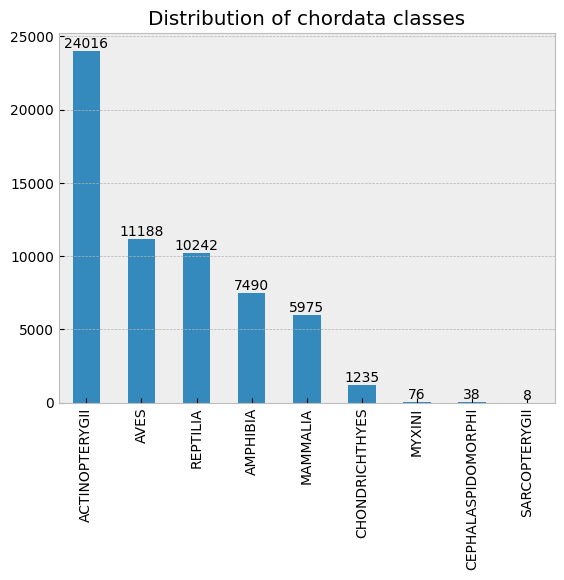

In [11]:
### Diagramma a barre
tmp = species.value_counts('className')
fig = tmp.plot.bar(title = 'Distribution of chordata classes', xlabel='')
fig.bar_label(fig.containers[0]) # scrive il valore sopra la rispettiva barra
fig.grid(axis = 'x')
plt.show()

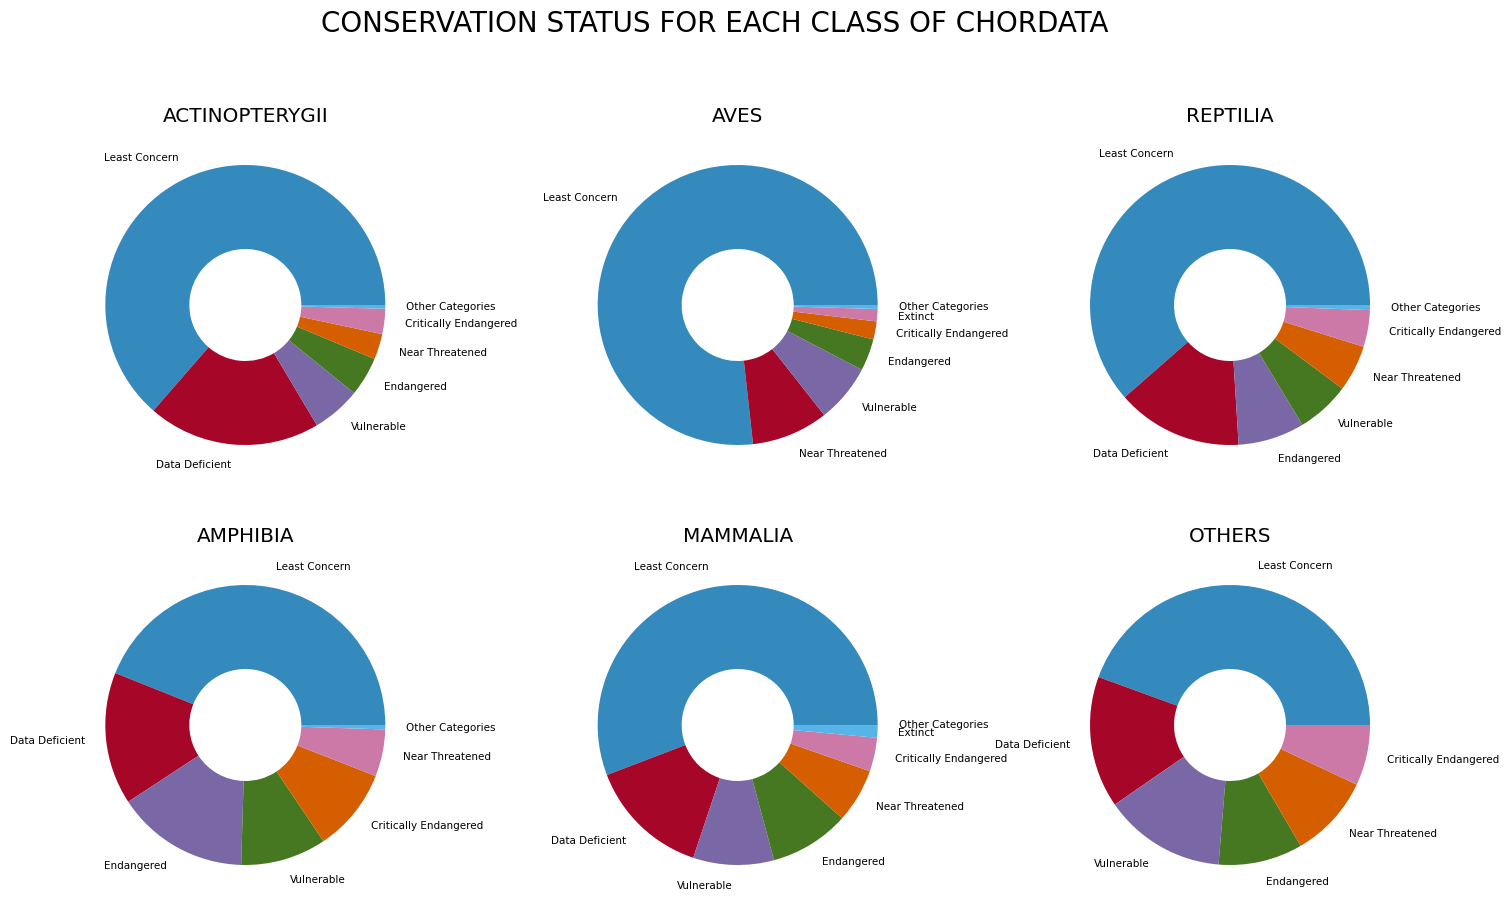

In [12]:
### Areogrammi "a ciambella"

### riunisco le classi minori in un'unica categoria 'OTHERS'
sel = species[['className', 'redlistCategory']].copy()
tmp = sel.value_counts('className')
gt1300 = tmp[tmp>=1300]
gt1300['OTHERS'] = tmp[tmp<1300].sum()
sel.loc[~(sel['className'].isin(gt1300.index)), 'className'] = 'OTHERS'
###

fig, axes = plt.subplots(2,3)
plt.suptitle('CONSERVATION STATUS FOR EACH CLASS OF CHORDATA', size = 20, y=1)

from itertools import product #prodotto cartesiano

# itero sulle classi di animale e sulle posizioni dei
# grafici nella figura di output (0,0), (0,1), ..., (1,2)
for cls, pos in zip(gt1300.index, product((0,1),(0,1,2))):

    tmp = sel.loc[sel['className'] == cls]
    tmp = tmp.value_counts('redlistCategory', normalize = True)
    gt_percentile = tmp[tmp>=0.01]
    gt_percentile['Other Categories'] = tmp[tmp<0.01].sum()

    # creazione del del subplot relativo alla classe su cui si sta iterando
    gt_percentile.plot.pie(title = cls, ylabel = '', ax = axes[*pos], 
                           figsize = (18, 10), fontsize = 7.5, 
                           labeldistance = 1.15, wedgeprops = dict(width=0.6))

<h3>L'albero tassonomico</h3>
<p>Nel 1700 il naturalista svedese Carlo Linneo, propose di catalogare piante e animali secondo principi rigorosi, introducendo di fatto quella che è la sistematica moderna.<br>
Questa classificazione delle creature è di natura gerarchica, in virtù della quale è possibile affermare che una specie animale sia il ramo terminale o foglia (escludendo eventuali ulteriori ramificazioni quali sottospecie o popolazioni) di una struttura ad albero, solitamente non dicotomica, così strutturata:<br>
Regno > Phylum (o Tipo) > Classe > Ordine > Famiglia > <i>Genere</i> > <i>Specie</i>,<br>
con eventuali ripartizioni intermedie.<br>
Riportando il solito esempio dell'orso bruno, esso è scientificamente così classificato:<br>
Animalia > Chordata > Mammalia > Carnivora > Ursidae > <i>Ursus</i> > <i>Ursus arctos</i>.

L'albero è stato implementato nella classe <tt>TaxonTree</tt> del modulo <tt>trees.py</tt>.<br>
Questo albero eredita molti metodi e attributi da una struttura più generica <tt>Tree</tt>, la cui caratteristica più interessante è quella di poter inserire un ramo in tempo O(log N) grazie all'albero di ricerca binaria in cui sono disposti i figli, mantenendo dunque intatto il loro ordinamento, e di conseguenza permettendo l'estrazione di un ramo figlio sempre in tempo logaritmico, tramite ricerca binaria.<br>
Di conseguenza la complessità computazionale per la creazione dell'albero è O(NlogN), al posto di O(N²) qualora si fosse scelto di utilizzare una lista classica. Per N > 60'000, come in questo caso, si tratta di un risparmio significativo.<br>
Anche l'utilizzo di un insieme o un dizionario sarebbe stata una valida alternativa, tuttavia in fase di stampa dovrebbe comunque essere convertito in una lista ed ordinato, impiegando in ogni caso un tempo O(NlogN), oltre ad essere didatticamente meno attraente di un <i>binary search tree</i>, implementato in maniera assai simile a quella presentata nel libro <i>Data Structures and Algorithms with Python</i> di K.D. Lee e S. Hubbard<a href="#N4"><sup>[4]</sup></a>.

Qui sotto viene data una dimostrazione di come agisce la classe.</p>

In [13]:
# i moduli completi del progetto, precedentemente solo abbozzati
from trees import TaxonTree
from animals import Animal as An # evita conflitti con la classe Animal dichiarata localmente
An.species = species
An.names = names

animals = [
            An('Panthera tigris'),          # tigre
            An('Istiophorus platypterus'),  # pesce vela
            An('Panthera leo'),             # leone
            An('Puma concolor'),            # puma
            An('Panthera Leo'),             # leone (duplicato)
            An('Makaira nigricans')         # marlin azzurro
          ]

print('Length of animals list:', len(animals))
taxontree = TaxonTree('ANIMALIA')
for animal in animals:
    taxontree.add_animal(animal) # non aggiunge duplicati!

taxontree.print() # visita in pre-ordine: prima la radice e poi i figli, in ordine alfabetico
print('There are only 5 different species in the tree!')


Length of animals list: 6
ANIMALIA
  CHORDATA
    ACTINOPTERYGII
      PERCIFORMES
        ISTIOPHORIDAE
          Istiophorus
            Istiophorus platypterus
          Makaira
            Makaira nigricans
    MAMMALIA
      CARNIVORA
        FELIDAE
          Panthera
            Panthera leo
            Panthera tigris
          Puma
            Puma concolor

There are only 5 different species in the tree!


<h3>Menù dinamico</h3>
<p>L'interfaccia con il menù contestuale è gestita da una classe <tt>Menu</tt>, che si basa su un dizionario di dizionari, nonché della caratteristica di Python di trattare le funzioni come oggetti.<br>
La voce principale del dizionario è il "tasto" che va premuto dall'utente, a cui sono associati una stringa di descrizione e la funzione che l'utente vuole chiamare.<p>

In [14]:
class Menu():
    def __init__(self, title:str = '', entries: list[tuple[str|int, str, callable]] = None):
        self.title = title
        self._menu = {}
        if entries: # permette di convertire una lista di tuple (indice, etichetta, azione) in un menù
            for idx, label, action in entries:
                self.add_action(idx, label, action)

    def add_action(self, idx: str|int, label: str, action: callable):
        self._menu[idx] = {'label' : label, 'action': action}
    
    def execute(self, idx: str|int) -> None:
        if self._menu.get(idx): # get serve a non alzare KeyError quando viene passata una chiave inesistente
            self._menu.get(idx)['action']() # le parentesi tonde finali permettono la chiamata della funzione
            # nelle parentesi tonde si possono anche passare dei parametri, se necessari

    def __str__(self) -> str:
        string = f"\n{self.title}\nActions:\n"
        for key, value in self._menu.items():
           string += f"   {key} - {value['label']}\n"
        return string

def fun1():
    print('fun1 works!')
def fun2():
    print('fun2 works!')
actions = [('1', 'call fun1', fun1),
           ('2', 'call fun2', fun2)]
menu = Menu('My Menu', actions)
print(menu)
choice = input('Enter choice: ')
menu.execute(choice)


My Menu
Actions:
   1 - call fun1
   2 - call fun2

fun1 works!


<h3>Uso e struttura dell'applicativo</h3>
<p>Associati a questo notebook, sono presenti anche alcuni file Python, dei quali <tt>launcher.py</tt> è il pannello di controllo, ossia quello che l'utente dovrebbe lanciare.<br>
In esso vengono invocate tutte funzionalità presentate fino ad ora, in particolare:<br>
<tt>menu.py</tt> predispone di una classe <tt>Menu</tt> che semplifica la struttura del launcher;<br>
<tt>animals.py</tt> contiene la classe <tt>Animal</tt>, in cui i DataFrame vengono assegnati come variabili di classe, per ottimizzare i tempi e lo spazio di lettura dei file csv. La classe contiene inoltre i metodi per istanziare un oggetto indifferentemente se a partire dal nome comune o dal nome scientifico;<br>
<tt>explore.py</tt> contiene le funzioni per creare, salvare ed aprire una pagina html con le informazioni contenute nel DataFrame <tt>assessments</tt> relative all'animale passato come parametro, e una funzione per aprire semplicemente sul proprio browser predefinito il sito internet dell'animale in questione;<br>
<tt>downloader.py</tt> fa uso di <tt>urllib.request</tt> della libreria standard per provare a cercare l'immagine dell'animale online e scaricarne i byte che la compongono, trasponendoli su un file di output jpg tramite scrittura binaria. In caso di eventuali errori in fase di download o salvataggio, le eccezioni vengono gestite senza interrompere il programma;<br>
<tt>charts.py</tt> crea i tre grafici mostrati nella sezione precedente, a cui si aggiunge una ricerca per classe;<br>
<tt>trees.py</tt> dispone di un contenitore <tt>TaxonTree</tt> adatto al salvataggio e alla stampa di un albero tassonomico.
</p>

<h3>Conclusioni</h3>
<p>Questo progetto nasce da un personale interesse verso le specie animali e la biodiversità in generale, che mi ha condotto ad approfondire questi temi con l'analisi dati in Python, in parte anche a dimostrazione di come la programmazione e l'elaborazione di strutture dati siano applicabili ai più disparati settori di studio e non solo.<br>
Spero inoltre di essere riuscito ad intrattenere il lettore e/o l'utilizzatore con un'opera gradevole ed intrigante, che comunichi una gamma di informazioni relativamente ampia sull'utilizzo di dati aggregati e formalmente esatta e coerente per quanto concerne il codice, ma che possa al contempo far scaturire una nuova consapevolezza sulla ricchezza della diversità biologica presente sul nostro Pianeta, e su come una rilevante porzione di essa sia vicina alla scomparsa, senza che mai nessuno, spesso neppure il mondo della biologia, venga a conoscenza dell'esistenza stessa di moltissime specie che ne fanno parte.<br></p>

<h3>Riferimenti</h3>
<ol>
<li id="N1"> IUCN. 2022. International Union for Conservation of Nature. <a href="https://www.iucn.org" target="_blank">https://www.iucn.org</a>. Consultato il 18 aprile 2023.</li>
<li id= "N2"> IUCN. 2022. The IUCN Red List of Threatened Species. Version 2022-2. <a href="https://www.iucnredlist.org" target="_blank">https://www.iucnredlist.org</a>. Consultato il 18 aprile 2023.</li>
<li id="N3"> DataFrame - pandas 2.0 documentation, su <a href="https://pandas.pydata.org/docs/reference/frame.html" target="_blank">https://pandas.pydata.org/docs/reference/frame.html</a>.</li>
<li id="N4"> K. D. Lee and S. Hubbard. "6.5.1 The BinarySearchTree Class". In <i>Data Structures and Algorithms with Python</i>, 170-176. Springer, 2015.</li>
<ol>

<html>
<head>
  <link rel="stylesheet" href="style.css" type="text/css">
</head>  
<body>
<footer>
<p class="small">22 maggio 2023: Giornata Internazionale della Biodiversità</p>
</footer>
</body>
</html>
